**Step 1: Use .describe(), .info(), .value_counts()**

In [1]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# 1. Info
print("---- INFO ----")
df.info()

# 2. Describe (numeric)
print("\n---- DESCRIBE (numeric) ----")
print(df.describe())

# 3. Value counts for categorical columns
print("\n---- VALUE COUNTS ----")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


---- INFO ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

---- DESCRIBE (numeric) ----
         survived      pclass     

**Step 2: Use sns.pairplot() and sns.heatmap()**

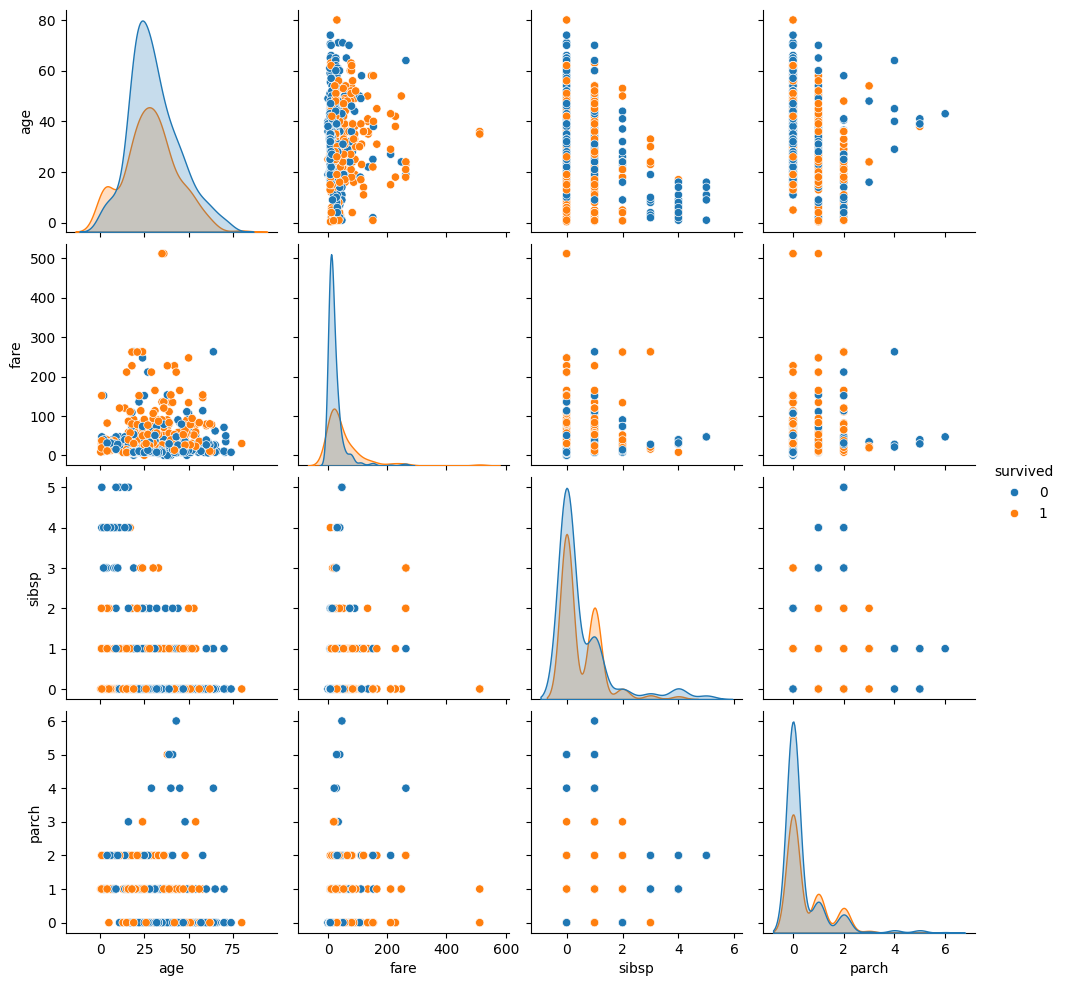

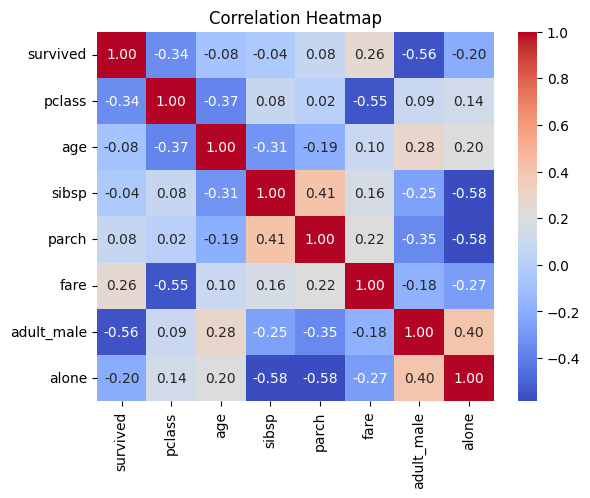

In [2]:
import matplotlib.pyplot as plt

# Pairplot (sample to avoid slow plots)
sns.pairplot(df[['age', 'fare', 'sibsp', 'parch', 'survived']].dropna(), hue='survived')
plt.show()

# Correlation heatmap (numeric only)
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Step 3: Identify relationships and trends(Example: survival rate by gender and class) **

In [3]:
# Survival rate by gender
print(df.groupby('sex')['survived'].mean())

# Survival rate by passenger class
print(df.groupby('class')['survived'].mean())

# Cross-tab of gender vs class survival
print(pd.crosstab(df['sex'], df['class'], values=df['survived'], aggfunc='mean'))


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


/tmp/ipython-input-3367646933.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('class')['survived'].mean())


**Step 4:  Plot histograms, boxplots, scatterplots**

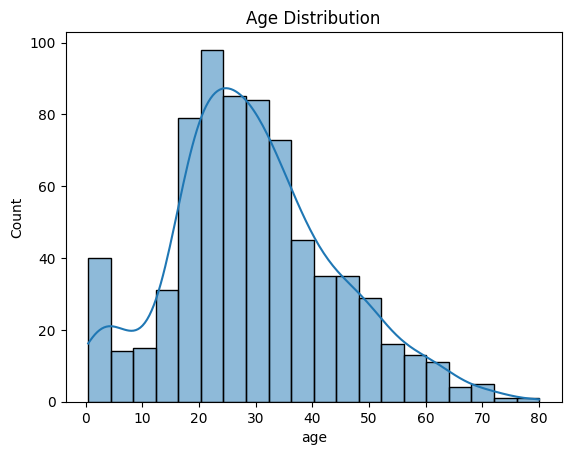

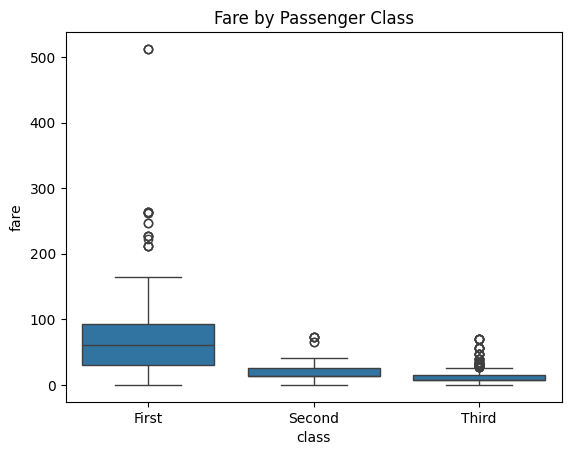

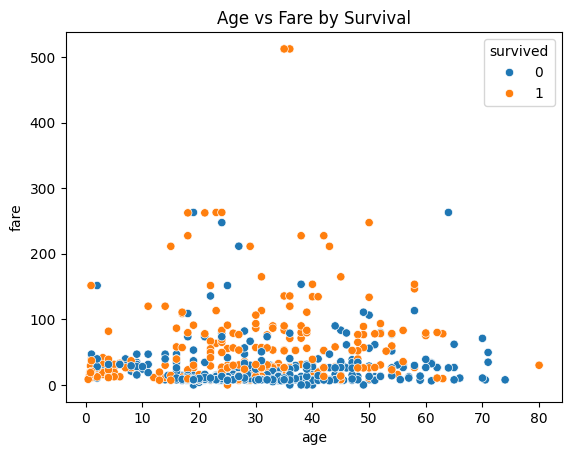

In [4]:
# Histogram of Age
sns.histplot(df['age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot of Fare by Class
sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()

# Scatterplot Age vs Fare colored by Survival
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()

**Step 5: Write observations for each visual (Example — replace with your own observations after seeing plots)**

In [5]:
print("""
Observations:
1. Age distribution shows most passengers between 20–40 years; children are fewer but have higher survival rates.
2. Fare distribution is skewed; higher fares generally correlate with higher survival.
3. Females and passengers in 1st class had higher survival rates.
4. Heatmap shows Fare and Class have a strong negative correlation.
""")


Observations:
1. Age distribution shows most passengers between 20–40 years; children are fewer but have higher survival rates.
2. Fare distribution is skewed; higher fares generally correlate with higher survival.
3. Females and passengers in 1st class had higher survival rates.
4. Heatmap shows Fare and Class have a strong negative correlation.



**Step 6: Provide summary of findings**

In [6]:
print("""
Summary of Findings:
- Key predictors of survival: Sex, Passenger Class, Fare, Age.
- Women and children were more likely to survive.
- Higher fares (often linked to 1st class) are associated with higher survival.
- Missing values exist in Age, Embarked, and Deck; they should be handled before modeling.
""")


Summary of Findings:
- Key predictors of survival: Sex, Passenger Class, Fare, Age.
- Women and children were more likely to survive.
- Higher fares (often linked to 1st class) are associated with higher survival.
- Missing values exist in Age, Embarked, and Deck; they should be handled before modeling.

